In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
from sklearn.manifold import TSNE
from collections import Counter

In [2]:
data = pd.read_csv("spam_Emails_data.csv", sep = ',')

In [3]:
data.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [4]:
data.isnull().sum()

label    0
text     2
dtype: int64

In [5]:
data = data.dropna(subset = ['label', 'text']).reset_index(drop = True)

In [6]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [7]:
data['text'] = data['text'].str.lower()
pd.set_option('future.no_silent_downcasting', True)
data['label'] = data['label'].replace({'Spam':0, 'Ham':1})

X = data['text']
Y = data['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [8]:
print(data['label'].dtype)
print(Y_train.dtype, Y_test.dtype)
print(Y_train.unique())

object
object object
[1 0]


In [9]:
data['label'] = data['label'].astype(int)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [10]:
vectorizer = TfidfVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [11]:
Counter(data['label'])

Counter({1: 102159, 0: 91691})

In [12]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    recall = recall_score(true, predicted)
    precision = precision_score(true, predicted)
    f1 = f1_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    return accuracy, f1, precision, recall, roc_auc

In [13]:
models = {
    'LinearSVC': LinearSVC(dual='auto'),
    'Logistic Regression': LogisticRegression(),
    'LightGBM' : LGBMClassifier(n_estimators=300, learning_rate=0.05, num_leaves=31, n_jobs=-1, verbose=-1),
    'SGD': SGDClassifier()
}

In [14]:
model_list=[]
acc_list=[]
model_objs=[]
precision_list=[]
recall_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_vectorized, Y_train)

    y_train_pred=model.predict(X_train_vectorized)
    y_test_pred=model.predict(X_test_vectorized)

    model_train_acc, model_train_f1, model_train_precision, model_train_recall, model_train_roc=evaluate_model(Y_train, y_train_pred)
    model_test_acc, model_test_f1, model_test_precision, model_test_recall, model_test_roc=evaluate_model(Y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Data")
    print(" - Accuracy Score : {:.4f}".format(model_train_acc))
    print(" - F1 Score : {:.4f}".format(model_train_f1))
    print(" - Precision Score : {:.4f}".format(model_train_precision))
    print(" - Recall Score : {:.4f}".format(model_train_recall))
    print(" - Roc Auc Score : {:.4f}".format(model_train_roc))


    print("-------------------------------------------------------------------")

    print("Model Performance for Testing Data")
    print(" - Accuracy Score : {:.4f}".format(model_test_acc))
    print(" - F1 Score : {:.4f}".format(model_test_f1))
    print(" - Precision Score : {:.4f}".format(model_test_precision))
    print(" - Recall Score : {:.4f}".format(model_test_recall))
    print(" - Roc Auc Score : {:.4f}".format(model_test_roc))

    model_objs.append(model)


    acc_list.append(model_test_acc)
    precision_list.append(model_test_precision)
    recall_list.append(model_test_recall)

    print("\n")
    print("$"*45)
    print("\n")

LinearSVC
Model Performance for Training Data
 - Accuracy Score : 0.9983
 - F1 Score : 0.9984
 - Precision Score : 0.9988
 - Recall Score : 0.9981
 - Roc Auc Score : 0.9983
-------------------------------------------------------------------
Model Performance for Testing Data
 - Accuracy Score : 0.9903
 - F1 Score : 0.9907
 - Precision Score : 0.9919
 - Recall Score : 0.9895
 - Roc Auc Score : 0.9903


$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


Logistic Regression
Model Performance for Training Data
 - Accuracy Score : 0.9839
 - F1 Score : 0.9847
 - Precision Score : 0.9902
 - Recall Score : 0.9793
 - Roc Auc Score : 0.9842
-------------------------------------------------------------------
Model Performance for Testing Data
 - Accuracy Score : 0.9784
 - F1 Score : 0.9793
 - Precision Score : 0.9853
 - Recall Score : 0.9734
 - Roc Auc Score : 0.9787


$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


LightGBM
Model Performance for Training Data
 - Accuracy Score : 0.9803
 - F1 Score 

In [15]:
pd.DataFrame(list(zip(model_list, acc_list, precision_list, recall_list)), columns=['Model Name', 'Accuracy Score', 'Precision Score', 'Recall Score']).sort_values(by=["Accuracy Score"],ascending=False)

,Model Name,Accuracy Score,Precision Score,Recall Score
0,LinearSVC,0.990250,0.991859,0.989516
1,Logistic Regression,0.978437,0.985254,0.973421
2,LightGBM,0.974955,0.984765,0.967170
3,SGD,0.970544,0.982924,0.960476


In [16]:
def TSNE_plot(model_clf, data, labels, title):
    model_clf.fit(data, labels)
    transformed_data = model_clf.decision_function(data)

    transformed_data = transformed_data.reshape(-1, 1)

    tsne_model = TSNE(n_components=2, random_state=0, init='random')
    tsne_data = tsne_model.fit_transform(transformed_data)

    tsne_data = np.vstack((tsne_data.T, labels)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

    sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")

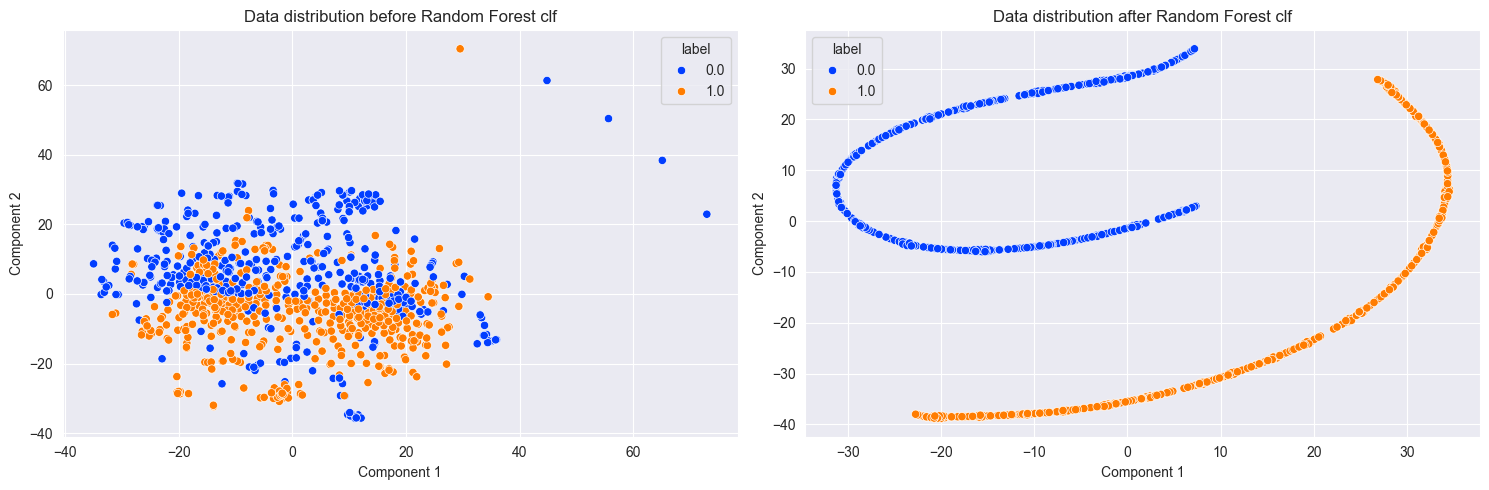

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
data_1000 = X_train_vectorized[0:1000, :]
labels_1000 = Y_train.iloc[0:1000]

tsne_model = TSNE(n_components=2, random_state=0, init='random')
tsne_data = tsne_model.fit_transform(data_1000)

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
plt.title("Data distribution before Random Forest clf")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.subplot(1, 2, 2)
TSNE_plot(LinearSVC(dual = 'auto'), data_1000, labels_1000, "Data distribution after Random Forest clf")

plt.tight_layout()
plt.show()

In [24]:
import gradio as gr
from sklearn.pipeline import make_pipeline
import tqdm as notebook_tqdm
import joblib

In [26]:
joblib.dump(model_objs[0], 'LinearCSV.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [22]:
model1 = make_pipeline(vectorizer, model_objs[0])
def spam_recog(text):
    prediction = model1.predict([text])[0]
    return "Spam Detected" if prediction == 0 else "Spam Not Detected"

sample_email = "Congratulations! You've won a $1000 gift card."
print(spam_recog(sample_email))

Spam Not Detected


In [23]:
interface = gr.Interface(
    fn=spam_recog,
    inputs= gr.Textbox(lines = 3, placeholder= 'Enter your text here...'),
    outputs = 'label',
    title = 'Spam Recognition Bot')

interface.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
